# Multiples of 3 and 5
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

## Solution 1 - Testing all numbers
The first solution one might consider is simply iterating over all numbers bellow 1000 and summing them up if they are a multiple of 3 or 5.

In [1]:
from utils.timing import timed

@timed(1000)
def solution_one(upper_bound: int) -> int:
    """
    sum all numbers that are multiple of 5 or 3 and under 'upper_bound'
    
    :param upper_bound: sum limit
    """
    return sum((i for i in range(upper_bound) if not i % 5 or not i % 3))

answer, time_elapsed = solution_one(1000)
print(f'The answer is: {answer}\nThat took: {time_elapsed}')

The answer is: 233168
That took: 0.15260281698829203


### Cost Model
| Solution | Time complexity |
| -------- | --------------- |
| 1        | $$O(n)$$        |

### Problems with solution one
The problem with this solution is that it iterates and checks every number in the range. In that sense a quick improvement would be to restrict the numbers we check so that we don't even have to check if they are multiples of 3 or 5

## Solution 2 - Limiting numbers tested
For this solution we restrict which numbers we check so we don't need to neither iterate  through the entire range nor check for divisibilty. In that sense we need to do the following:
- Sum all multiples of 3
- Sum all multiples of 5
- Subtract all multiples of 15<sup>*</sup> \
<sub>*we need to do that because we are double counting the mutiples of 15: we first count them when summing all multiples of three and then count them again when summing all mutiples of 5</sub>

In [2]:
from utils.timing import timed

@timed(1000)
def solution_two(upper_bound: int) -> int:
    """
    sum all numbers that are multiple of 5 or 3 and under 'upper_bound'
    
    :param upper_bound: sum limit
    """
    multiples_of_three = sum((i for i in range(3, upper_bound, 3)))
    multiples_of_five = sum((i for i in range(5, upper_bound, 5)))
    multiples_of_15 = sum((i for i in range(15, upper_bound, 15)))
    return multiples_of_five + multiples_of_three - multiples_of_15
    
answer, time_elapsed = solution_two(1000)
print(f'The answer is: {answer}\nThat took: {time_elapsed}')

The answer is: 233168
That took: 0.036769459001334326


### Cost Model
| Solution | Time complexity |
| -------- | --------------- |
| 1        | $$O(n)$$        |
| 2        | $$O(n)$$        |

### Problems with solution two
While solution two runs faster than solution one by limiting the numbers we test, it still has to iterate through a lot of numbers and growing linearly with the input. If we want to improve our solution even further, we must find a way to avoid that iteration.

## Solution 3 - Arithmetic Progression
Looking closely at solution 2, it becomes clear that we are just summing numbers in an arithmetic progression, for example, for multiples of 3 we did:

$$ \text{multiples of three} = 3 + 6 + 9 + ... $$

Therefore, we can use the arithmetic progression sum to improve our running time even further!

$$ S_n = \frac{1}{2} n (a_1 + a_n) $$

In order to use that formula still we need to:
1. find the number of multiples in the range
2. find the last multiple

To find the number of multiples of $n$ in a range from 1 to $k$ we can use the following formula:

$$ \text{multiples} = \lfloor\frac{k}{n}\rfloor $$

With that, we can use the following formula to find the last multiple

$$ \text{last multiple} = \text{multiples} \cdot n $$

In [3]:
from utils.timing import timed
from math import floor

def sum_arithmetic_prog(first: int, last: int, quantity: int) -> int:
    """
    sums an arithmetic progression
    
    :param first: first term
    :param last: last term
    :param quantity: how many terms are in the progression
    """
    return int(quantity * (first + last) / 2)

@timed(1000)
def solution_three(upper_bound: int) -> int:
    """
    sum all numbers that are multiple of 5 or 3 and under 'upper_bound'
    
    :param upper_bound: sum limit
    """
    # == find number of multiples == # 
    multiples_of_3 = floor(upper_bound / 3)
    multiples_of_5 = floor(upper_bound / 5)
    multiples_of_15 = floor(upper_bound / 15)

    # == sum the multiples using the arithmetic progression formula == #
    sum_3 = sum_arithmetic_prog(3, 3 * multiples_of_3, multiples_of_3)
    sum_5 = sum_arithmetic_prog(5, 5 * multiples_of_5, multiples_of_5)
    sum_15 = sum_arithmetic_prog(15, 15 * multiples_of_15, multiples_of_15)
    
    return sum_3 + sum_5 - sum_15
    
answer, time_elapsed = solution_three(1000)
print(f'The answer is: {answer}\nThat took: {time_elapsed}')

The answer is: 234168
That took: 0.0013055759936833056


### Cost Model
| Solution | Time complexity |
| -------- | --------------- |
| 1        | $$O(n)$$        |
| 2        | $$O(n)$$        |
| 3        | $$O(1)$$        |

### Solution three
Solution 3 solves the main problem with the other 2: it does not need to iterate over any number to find the solution.

[[0.006656169982306892], [0.0030401200074265944], [0.0008382739843000309]]


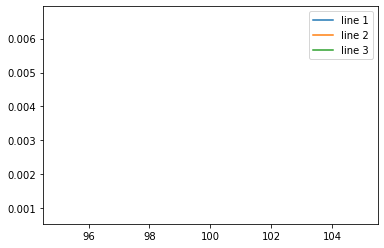

In [4]:
from utils.plotting import plot_range

params = tuple((i,) for i in range(1000, 10000, 100000))
plot_range(params, (solution_one, solution_two, solution_three))